# **Step 1. 이것만큼은 꼭 해보세요!**

프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제하고 변환하되, 아래 내용만큼은 반드시 실습해봅시다.

cars.csv와 brand.csv의 데이터 합치기

[힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.

카테고리형 변수를 숫자 형태로 변환하기

[힌트] Engine, Emission Class 변수에 주목하세요!

결측치 처리하기

[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

Scaler 활용해보기

기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)
# **Step 2. 이런것도 해볼 수 있어요!**

자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.

1. 국가별 총 브랜드 개수는?

2. 상관관계가 높은 변수들이 있는지 확인해보세요.

In [225]:
# 파일 불러오기
import pandas as pd
cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars.csv')
brand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brand.csv')

cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [226]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [227]:
# title을 띄어쓰기를 기준으로 왼쪽 브랜드명만 출력
cars['title'] = cars['title'].str.split(' ').str[0]
# 대문자를 소문자로 변경
cars['title'] = cars['title'].str.lower()

In [243]:
# cars와 brand를 title 컬럼을 기준으로 합치기
project = cars.merge(brand, how='left', on='title')
project

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,South Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,France
3683,audi,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3684,bmw,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,Germany
3685,honda,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,Japan


In [244]:
# Service history 결측치를 Unknown으로 채우기
project['Service history'] = project['Service history'].fillna('Unknown')
project.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic
1,vauxhall,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,South Korea
3,mini,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,United Kingdom


In [246]:
import numpy as np

# 카테고리형 변수를 숫자 형태로 변경하기
project['Emission Class'] = project['Emission Class'].str.split(' ').str[1] # Euro 문자열 삭제
project['Engine'] = project['Engine'].str.rstrip('L') # L 문자열 삭제

# str에서 float 숫자 형태로 변경
project['Emission Class'] = pd.to_numeric(project['Emission Class'], errors='coerce')
project['Engine'] = pd.to_numeric(project['Engine'], errors='coerce')

project[['Emission Class', 'Engine']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emission Class  3600 non-null   float64
 1   Engine          3642 non-null   float64
dtypes: float64(2)
memory usage: 57.7 KB


In [245]:
# Fuel type을 0과 1으로 변환해보기
# Disel은 0, Petrol은 1

project['Fuel type'] = project['Fuel type'].replace({'Diesel': 0, 'Petrol': 1})
project.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,0,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,Czech Republic
1,vauxhall,1495,88585,2008,4.0,1,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,1,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,South Korea
3,mini,2395,96731,2010,5.0,1,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,United Kingdom
4,vauxhall,1000,85000,2013,NaN,0,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,United Kingdom


In [248]:
# 결측치 확인해보기
  # 결측치 데이터가 4개 이상인 경우 데이터 제거하기

# 결측치 확인
project.isna().sum()

project = project[project.isna().sum(axis = 1) < 4]
project # 3,687 rows에서 3,674 rows로 13개의 데이터가 제거됨

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,skoda,6900,70189,2016,3.0,0,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,Czech Republic
1,vauxhall,1495,88585,2008,4.0,1,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,United Kingdom
2,hyundai,949,137000,2011,NaN,1,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
3,mini,2395,96731,2010,5.0,1,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,United Kingdom
4,vauxhall,1000,85000,2013,NaN,0,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,renault,1395,76202,2006,4.0,1,Hatchback,1.6,Manual,5.0,5.0,4.0,Unknown,France
3683,audi,6990,119000,2012,NaN,1,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany
3684,bmw,3995,139000,2013,NaN,0,Saloon,2.0,Manual,4.0,5.0,5.0,Unknown,Germany
3685,honda,1390,179190,2007,NaN,0,Estate,2.2,Manual,5.0,5.0,4.0,Full,Japan


In [264]:
# Scaler 활용해볼 단계
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 숫자형 컬럼들만 모으기
nums = ['Price', 'Mileage(miles)', 'Registration_Year',
        'Previous Owners','Engine',
        'Doors', 'Seats', 'Emission Class']

# standardscaler를 사용하기
ss = StandardScaler()
ss_df = pd.DataFrame(ss.fit_transform(project[nums]), columns=nums, index=project.index)
ss_df.head()

# robustscaler를 사용하기
rs = RobustScaler()
rs_df = pd.DataFrame(rs.fit_transform(project[nums]), columns=nums, index=project.index)
rs_df.head()

# minmaxscaler를 사용하기
mm = MinMaxScaler()
mm_df = pd.DataFrame(mm.fit_transform(project[nums]), columns=nums, index=project.index)
mm_df.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
0,0.194030,0.063227,0.875000,0.250,0.109091,1.000000,0.6,1.0
1,0.032687,0.079798,0.763889,0.375,0.072727,0.333333,0.6,0.6
2,0.016388,0.123412,0.805556,NaN,0.109091,1.000000,0.6,0.8
3,0.059552,0.087136,0.791667,0.500,0.109091,0.333333,0.4,0.6
4,0.017910,0.076569,0.833333,NaN,0.090909,1.000000,0.6,0.8


PCA는 아직 제대로 이해가 되지 않아 실습으로까지 진행이 어려웠어요...
# Step 2 진행
1. 국가별 총 브랜드 개수 구하기

In [272]:
# 국가 및 브랜드 확인하기
project['country'].unique()
project['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [279]:
# 국가별 브랜드 개수
project.groupby('country')['title'].value_counts()

country         title        
Czech Republic  skoda             63
France          peugeot          245
                renault          175
                citroen           95
                ds                 6
Germany         volkswagen       271
                bmw              268
                mercedes-benz    168
                audi             146
                smart              4
                porsche            3
Italy           fiat             103
                alfa              18
                abarth             3
                maserati           3
Japan           toyota           193
                nissan           178
                honda            108
                mazda             53
                suzuki            41
                mitsubishi        32
                subaru            11
                lexus              9
                infiniti           7
                daihatsu           2
                isuzu              1
Malaysia        proton             3
Romania         dacia             14
South Korea     hyundai           93
                kia               82
                ssangyong          2
                daewoo             1
Spain           seat              60
Sweden          volvo             40
                saab               7
United Kingdom  vauxhall         549
                mini              97
                land              35
                jaguar            30
                mg                10
                rover              5
                lagonda            1
                marcos             1
United States   ford             409
                chevrolet         14
                jeep               9
                chrysler           5
                dodge              1
Name: count, dtype: int64

2. 상관관계가 높은 변수들이 있는지 확인해보기

In [281]:
corr = project[nums].corr()
corr

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.500791,0.724554,-0.480622,-0.022714,0.113335,-0.027393,0.697992
Mileage(miles),-0.500791,1.000000,-0.412872,0.317678,0.332109,-0.037024,0.095271,-0.378377
Registration_Year,0.724554,-0.412872,1.000000,-0.502078,-0.290240,0.219365,0.037166,0.920095
Previous Owners,-0.480622,0.317678,-0.502078,1.000000,0.195676,-0.153262,-0.029338,-0.476526
Engine,-0.022714,0.332109,-0.290240,0.195676,1.000000,-0.061935,0.072934,-0.264197
Doors,0.113335,-0.037024,0.219365,-0.153262,-0.061935,1.000000,0.497160,0.181788
Seats,-0.027393,0.095271,0.037166,-0.029338,0.072934,0.497160,1.000000,0.022541
Emission Class,0.697992,-0.378377,0.920095,-0.476526,-0.264197,0.181788,0.022541,1.000000


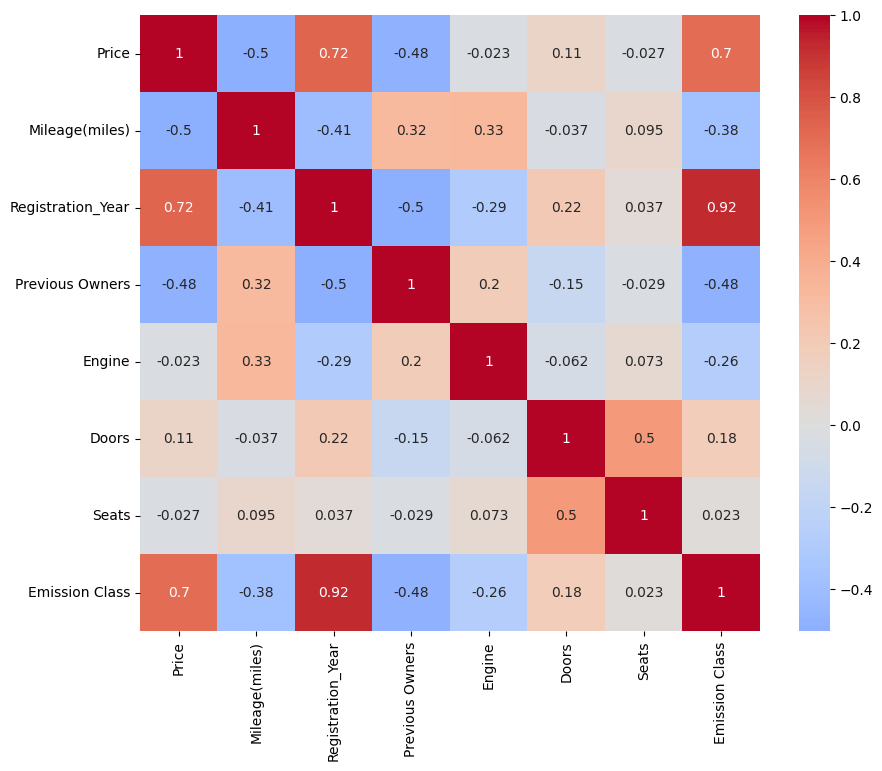

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(project[nums].corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

# 해석
*   Registration_year와 Emission class가 가장 상관계수가 높은 것으로 확인

-> 등록 연도가 최근일수록 배출 가스 등급이 높다 (신형 차량일수록 친환경적)

*   Price와 Registration_year도 상관계수가 높은 것으로 확인

-> 최근에 등록된 차일수록 가격이 높다

*   Price와 Emission class도 비슷하게 상관계수가 높은 것으로 확인

-> 배출 가스 등급이 좋은 차량일수록 가격이 높다

*  Mileage(miles)와 Price는 상관계수가 낮은 것으로 확인

-> 주행 거리가 많을수록 가격이 낮다

*   Registration_year와 previous owners도 상관계수가 낮은 것으로 확인

-> 오래된 차일수록 이전 소유자가 많다

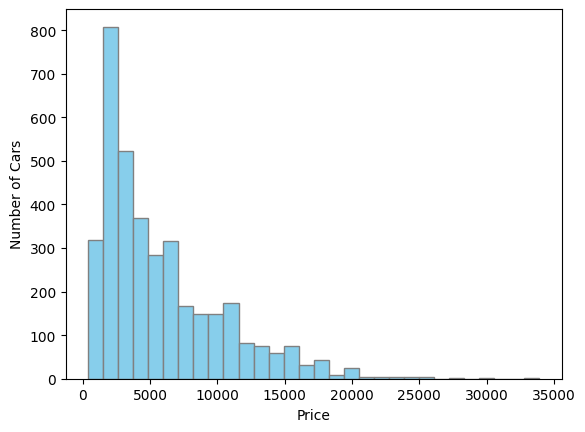

In [291]:
plt.hist(project['Price'], bins=30, color='skyblue', edgecolor='gray')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.show()



*   x축 = 가격, y축 = 차의 갯수
*   y축이 높을 수록 차의 갯수가 많다는 것이고, y축으로 길수록 가격이 비싸다는 것
*   해당 데이터는 **비싼 차는 적고, 저렴한 차가 많은 것으로 보여진다**



In [311]:
# 현대자동차 데이터 확인해보기

hyundai = project[project['title'] == 'hyundai']
hyundai.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
2,hyundai,949,137000,2011,NaN,1,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,South Korea
5,hyundai,800,124196,2007,3.0,1,Coupe,2.0,Manual,3.0,4.0,4.0,Unknown,South Korea
71,hyundai,1750,130000,2010,4.0,1,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,South Korea
141,hyundai,1500,100600,2010,4.0,1,Hatchback,1.2,Manual,5.0,5.0,4.0,Unknown,South Korea
152,hyundai,1999,105000,2010,7.0,1,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,South Korea


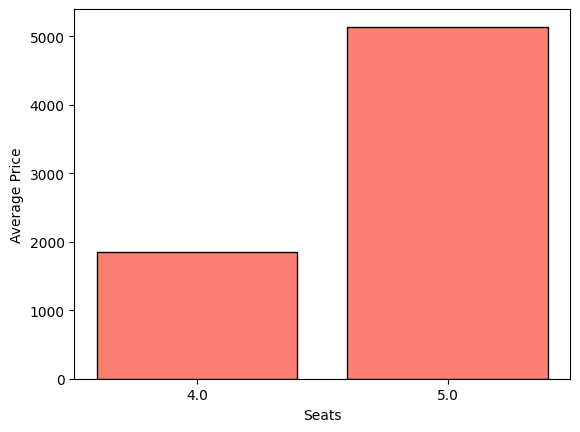

In [315]:
seat_price = hyundai.groupby('Seats')['Price'].mean()

plt.bar(seat_price.index.astype(str), seat_price.values, color='salmon', edgecolor='black')
plt.xlabel('Seats')
plt.ylabel('Average Price')
plt.show()

*   좌석 시트가 4개라면, 소형 세단이나 쿠페처럼 작고 스포티한 차량이다.
*   좌석 시트가 5개라면, 일반 승용차나 SUV처럼 가족용 차량이다.

-> **5인승 차량이 4인승 차량보다 평균적으로 훨씬 비싸다.**



In [320]:
# 브랜드별 평균 가격
brand_price = project.groupby('title')['Price'].mean().sort_values(ascending=False)
brand_price

# 가장 비싼 브랜드 확인
most_expensive_brand = brand_price.index[0]
most_expensive_price = brand_price.iloc[0]
print(f"가장 비싼 브랜드는 '{most_expensive_brand}'이며, 평균 가격은 약 ${most_expensive_price:.0f} 이다.")

가장 비싼 브랜드는 'lagonda'이며, 평균 가격은 약 $14995 이다.
